# Libraries Import

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
from sklearn.preprocessing import OrdinalEncoder

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
import seaborn as sea


In [23]:
import numpy as np

In [54]:
from sklearn.metrics import r2_score

# Data Extraction

In [7]:
data = pd.DataFrame()
import_d = pd.read_csv(r"C:\Users\ASUS\Desktop\Data Centre\restaurant_sales_data.csv")

In [8]:
import_d.head(2)

,Order ID,Customer ID,Category,Item,Price,Quantity,Order Total,Order Date,Payment Method
0,ORD_705844,CUST_092,Side Dishes,Side Salad,3.0,1.0,3.0,21-12-2023,Credit Card
1,ORD_338528,CUST_021,Side Dishes,Mashed Potatoes,4.0,3.0,12.0,19-05-2023,Digital Wallet


In [9]:
import_d.columns

Index(['Order ID', 'Customer ID', 'Category', 'Item', 'Price', 'Quantity',
       'Order Total', 'Order Date', 'Payment Method'],
      dtype='object')

In [10]:
data = import_d.copy()

# Removing Noise

In [11]:
data.columns

Index(['Order ID', 'Customer ID', 'Category', 'Item', 'Price', 'Quantity',
       'Order Total', 'Order Date', 'Payment Method'],
      dtype='object')

In [12]:
data.drop(['Order ID', 'Customer ID','Payment Method','Order Date'],axis = 1,inplace= True)

# Handling Null Values

In [13]:
(data.isnull().sum()/len(data))*100

Category        0.000000
Item           10.026235
Price           4.996008
Quantity        2.452378
Order Total     2.452378
dtype: float64

<Axes: >

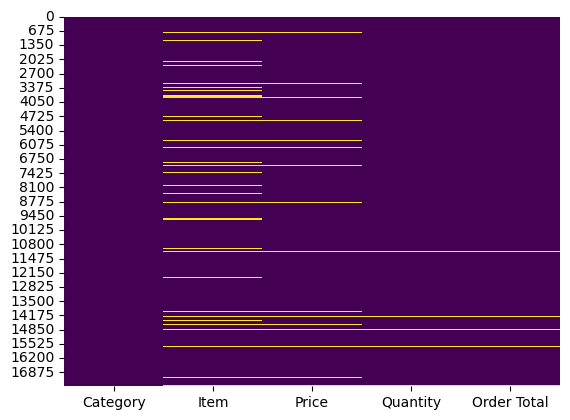

In [14]:
sea.heatmap(data.isnull(), cbar=False, cmap="viridis")

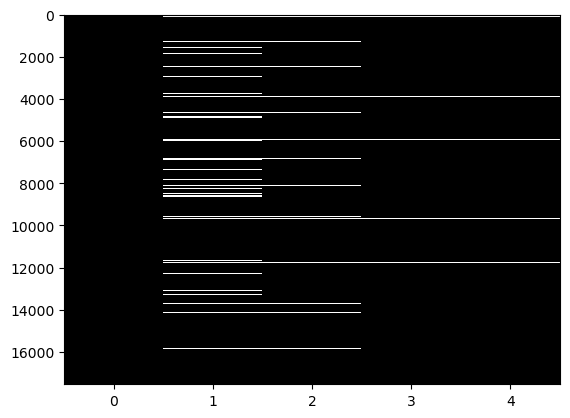

In [15]:
plt.imshow(data.isnull(), aspect='auto', cmap='gray', interpolation='nearest')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14344\430788426.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sea.barplot(x=null_counts.index, y=null_counts.values, palette="viridis")


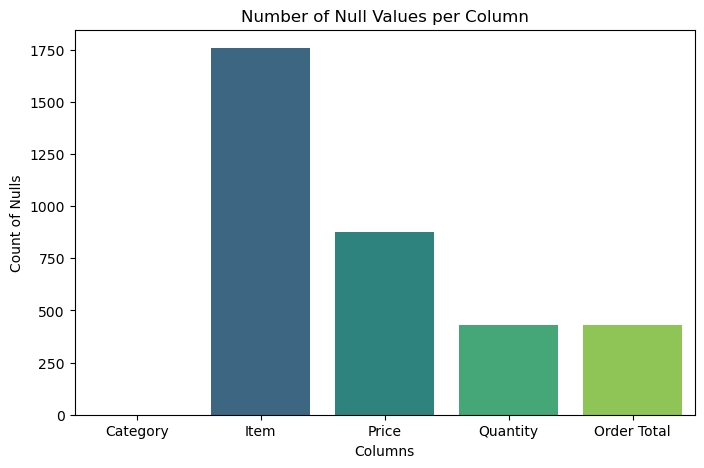

In [16]:
null_counts = data.isnull().sum()
plt.figure(figsize=(8,5))
sea.barplot(x=null_counts.index, y=null_counts.values, palette="viridis")
plt.title("Number of Null Values per Column")
plt.ylabel("Count of Nulls")
plt.xlabel("Columns")
plt.show()

In [17]:
data_cleaned = data.dropna()

In [18]:
data = data_cleaned.copy()

In [19]:
data.head(3)

,Category,Item,Price,Quantity,Order Total
0,Side Dishes,Side Salad,3.0,1.0,3.0
1,Side Dishes,Mashed Potatoes,4.0,3.0,12.0
2,Main Dishes,Grilled Chicken,15.0,4.0,60.0


In [20]:
data_cleaned.head(3)

,Category,Item,Price,Quantity,Order Total
0,Side Dishes,Side Salad,3.0,1.0,3.0
1,Side Dishes,Mashed Potatoes,4.0,3.0,12.0
2,Main Dishes,Grilled Chicken,15.0,4.0,60.0


# Removing the Outliers

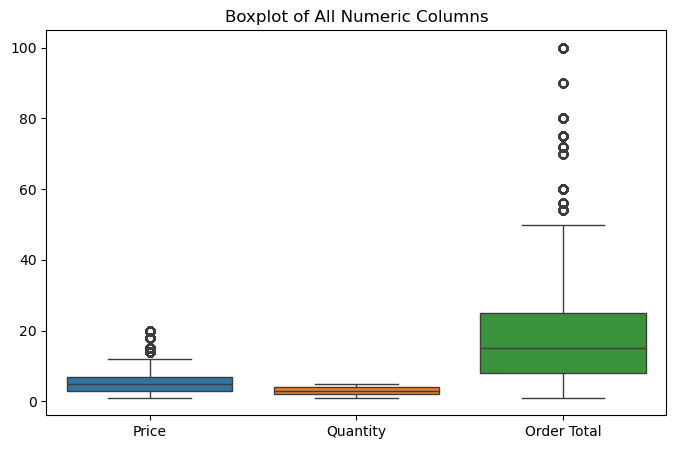

In [21]:
plt.figure(figsize=(8,5))
sea.boxplot(data=data)
plt.title("Boxplot of All Numeric Columns")
plt.show()

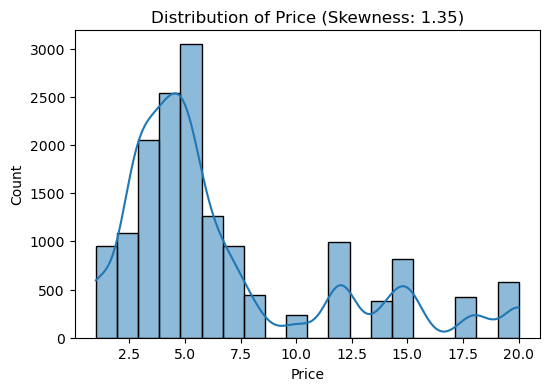

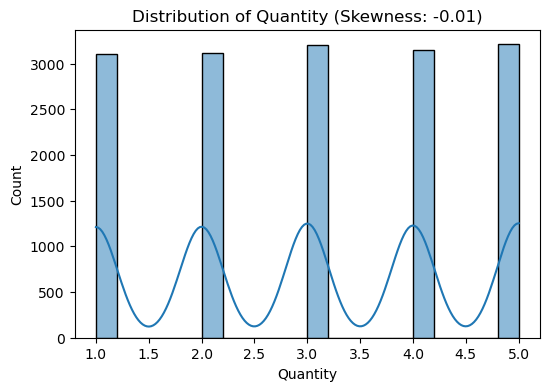

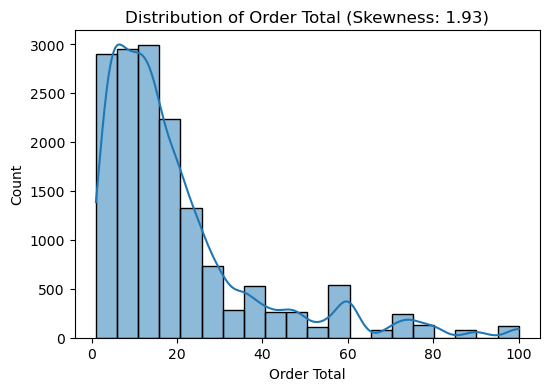

In [24]:
for col in data.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(6,4))
    sea.histplot(data[col], kde=True, bins=20)
    plt.title(f"Distribution of {col} (Skewness: {data[col].skew():.2f})")
    plt.show()

In [25]:
data.columns


Index(['Category', 'Item', 'Price', 'Quantity', 'Order Total'], dtype='object')

In [26]:
Q1 = data['Price'].quantile(0.25)
Q2 = data['Price'].quantile(0.75)
IQR = Q2-Q1

In [27]:
Upperlimit = Q2 + 1.5*IQR
Lowerlimit = Q1 - 1.5*IQR

In [28]:
data = data[(data['Price'] >= Lowerlimit) & (data['Price'] <= Upperlimit)]

In [29]:
Q1 = data['Order Total'].quantile(0.25)
Q2 = data['Order Total'].quantile(0.75)
IQR = Q2-Q1

In [30]:
Upperlimit = Q2 + 1.5*IQR
Lowerlimit = Q1 - 1.5*IQR

In [31]:
data = data[(data['Order Total'] >= Lowerlimit) & (data['Order Total'] <= Upperlimit)]

In [32]:
data.shape

(13097, 5)

# Seperating the Training and Testing

In [33]:
data.columns

Index(['Category', 'Item', 'Price', 'Quantity', 'Order Total'], dtype='object')

In [34]:
x = data[['Category','Item','Order Total']]
y = data[['Price','Quantity']]

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# Encoding

In [36]:
data.columns

Index(['Category', 'Item', 'Price', 'Quantity', 'Order Total'], dtype='object')

In [37]:
data.head(3)

,Category,Item,Price,Quantity,Order Total
0,Side Dishes,Side Salad,3.0,1.0,3.0
1,Side Dishes,Mashed Potatoes,4.0,3.0,12.0
6,Side Dishes,Garlic Bread,4.0,5.0,20.0


In [38]:
encoder = OrdinalEncoder()

In [44]:
x_train = encoder.fit_transform(x_train[['Category', 'Item']])

In [45]:
x_test = encoder.fit_transform(x_test[['Category', 'Item']])

# Scaling the data

In [42]:
scaler = StandardScaler()

In [46]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [48]:
y_train = scaler.fit_transform(y_train)
y_test = scaler.fit_transform(y_test)

# Modelling the data

In [49]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(
    n_estimators=146,       
    max_depth=None,         
    random_state=42,        
    n_jobs=-1               
)

In [50]:
model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=146, n_jobs=-1, random_state=42)

In [51]:
y_pred = model.predict(x_test)

In [57]:
accuracy = r2_score(y_test,y_pred)
print(f"The Accuracy of the model is:{accuracy*100}")

The Accuracy of the model is:50.50560144136429
